Nama : Muhammad Rayyan Aqiilah Manna

NIM : 1103210210

Tugas : Tugas Week 9 Binary Classification NN House Price

Dataset : housepricedata.csv

Dokumentasi ChatGPT : https://chatgpt.com/share/d03cdc5b-47d3-4cff-8800-2ff4a2341bb8

In [ ]:
from google.colab import drive

# This will prompt you to authorize Google Drive access.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ganti 'your_dataset.csv' dengan path ke file CSV Anda di Google Drive.
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set target dan features
target = 'AboveMedianPrice'
features = df.columns[df.columns != target]

# Memisahkan fitur dan target
X = df[features]
y = df[target]

# Normalisasi data fitur ke rentang [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi 70% untuk training dan 30% untuk validation dan test
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split 30% data menjadi 50% validation dan 50% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Membuat model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Kompilasi model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melihat ringkasan model
model.summary()

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5176 - val_loss: 0.6833 - val_accuracy: 0.5251
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5196 - val_loss: 0.6716 - val_accuracy: 0.5205
Epoch 3

Kode di atas menggunakan TensorFlow dan Keras untuk membuat dan mengkompilasi model neural network dengan tiga lapisan: dua lapisan tersembunyi dengan 32 neuron dan fungsi aktivasi ReLU, serta satu lapisan output dengan satu neuron dan fungsi aktivasi sigmoid untuk klasifikasi biner. Model ini kemudian dikompilasi menggunakan optimasi stochastic gradient descent dan fungsi loss binary cross-entropy dengan metrik akurasi. Untuk visualisasi, model diubah menjadi format grafis dot menggunakan model_to_dot, disimpan dalam memori sebagai byte array, dan kemudian ditampilkan sebagai gambar menggunakan PIL.Image dan matplotlib, sehingga memungkinkan untuk menampilkan arsitektur model langsung tanpa menyimpan ke file terlebih dahulu.

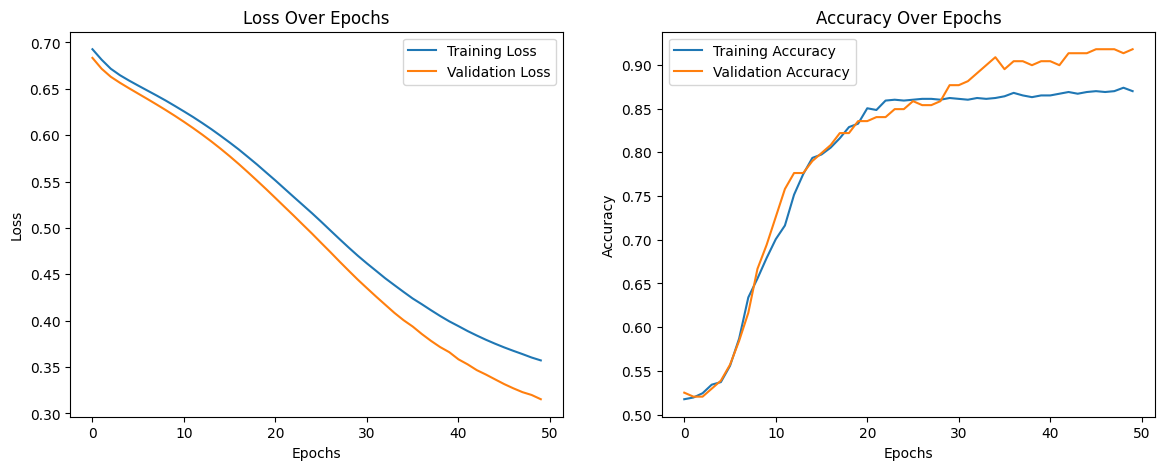

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tampilan hasil plotting dari uji akurasi model